In [2]:
# using DataFrames
# using CSV
include("PVCR.jl");
include("functions/plotting_base_gd.jl")

┌ Info: Recompiling stale cache file /Users/arnavgautam/.julia/compiled/v1.1/GLM/6OREG.ji for GLM [38e38edf-8417-5370-95a0-9cbb8c7f171a]
└ @ Base loading.jl:1184


plot_segmented_tariff_category_with_regression (generic function with 2 methods)

In [3]:
# Read in all of the utility bills for the various utilities and tariff types
base_GD = CSV.read("data/Base_GD.csv")

# Narrow down to {Residential | Commerical Industrial | Medium Voltage} ICE customers

all_ice = filter(row -> (!ismissing(row.EMPRESA) && row.EMPRESA == "ICE"), base_GD)

,ANNO,MES,ENERGIA_GENERADA,ENERGIA_DEPOSITADA,ENERGIA_RETIRADA,IMPORTE_POR_ENERGIA_RETIRADA
,Int64,Int64,Float64⍰,Float64⍰,Float64⍰,Float64⍰
1,2018,1,1511.0,774.0,741.0,19992.0
2,2018,2,1343.0,718.0,658.0,18332.0
3,2018,3,1537.0,665.0,753.0,20979.0
4,2018,4,1789.0,898.0,876.0,24405.0
5,2018,5,1623.0,944.0,796.0,22177.0
6,2018,6,1108.0,530.0,543.0,15128.0
7,2018,7,1398.0,632.0,685.0,18337.0
8,2018,8,1265.0,653.0,619.0,17245.0
9,2018,9,1321.0,753.0,648.0,18053.0


┌ Warning: `T` is deprecated, use `nonmissingtype` instead.
│   caller = compacttype(::Type, ::Int64) at show.jl:39
└ @ DataFrames /Users/arnavgautam/.julia/packages/DataFrames/m9gd9/src/abstractdataframe/show.jl:39


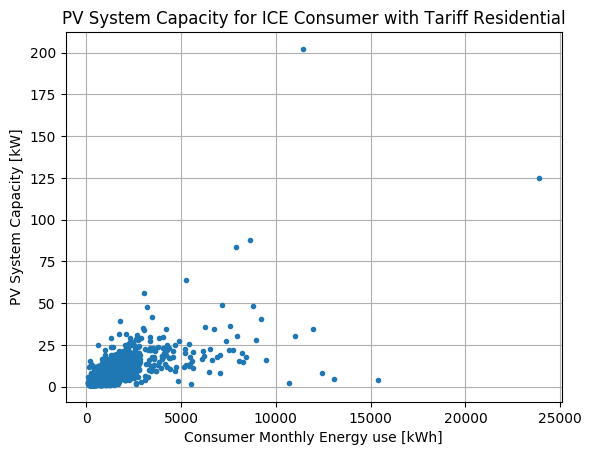

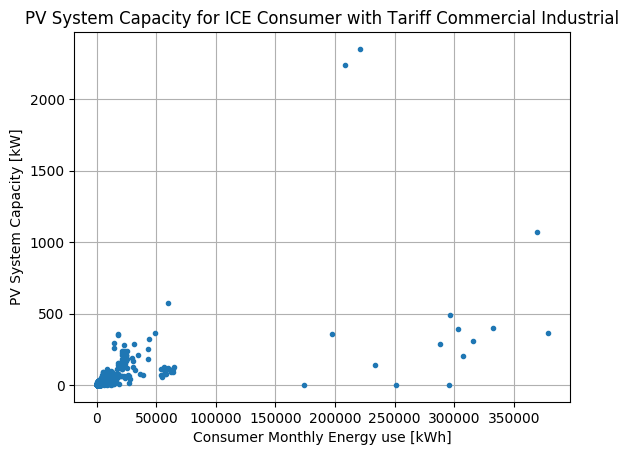

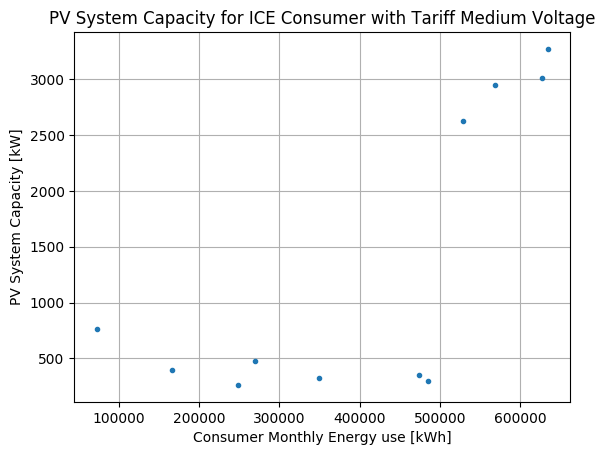

In [4]:
# Plot out what consumers truly install
plot_all_tariffs_per_company(all_ice, "ICE")

In [5]:
# Compare this real-world data with the predicted adoption of the economically rational model in Notebook 4

# Residential
res_consumption = 100:100:5000
res_model_predictions = []
for (ix, co) in enumerate(res_consumption)
    ice_residential.econsumption = co; get_pmax(ice_residential);
    res = optimal_pv(ice_residential, PVRes, 0.0:2:30, BAC1, tariff_increase = true)
    push!(res_model_predictions, res[1][2])
end

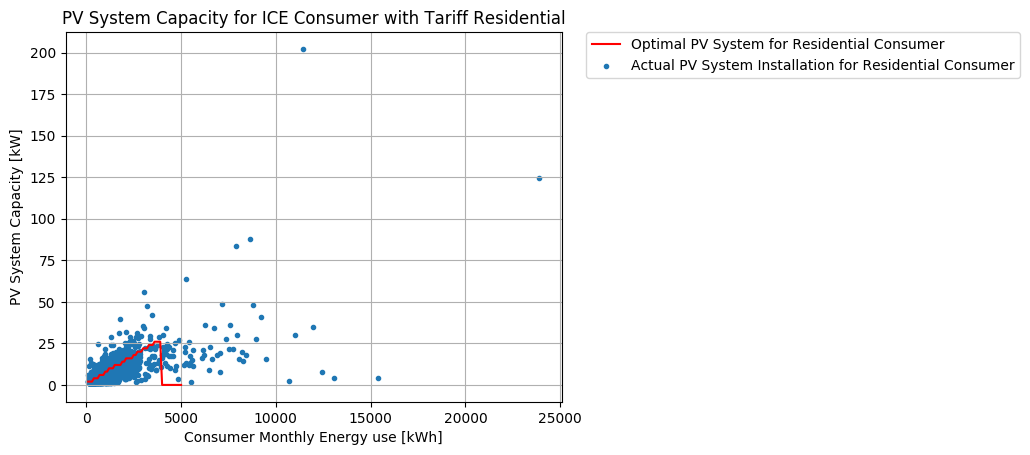

PyObject Text(0.5, 1, 'PV System Capacity for ICE Consumer with Tariff Residential')

In [6]:
plot_single_tariff_category_per_company_with_model_prediction(all_ice, "Residential", "ICE", res_consumption, res_model_predictions)

In [9]:
# Commerical Industrial
consumption1 = 100:100:1000
comind_model_predictions = []
for (ix, co) in enumerate(consumption1)
    ice_commercial.econsumption = co; get_pmax(ice_commercial);
    res = optimal_pv(ice_commercial, PVRes, 0.0:10:100, BAC1, tariff_increase = true)
    push!(comind_model_predictions, res[1][2])
end

consumption2 = 2000:1000:10000
for (ix, co) in enumerate(consumption2)
    ice_commercial.econsumption = co; get_pmax(ice_commercial);
    res = optimal_pv(ice_commercial, PVRes, 0.0:10:200, BAC1, tariff_increase = true)
    push!(comind_model_predictions, res[1][2])
end

consumption3 = 20000:10000:100000
for (ix, co) in enumerate(consumption3)
    ice_industrial.econsumption = co; get_pmax(ice_industrial);
    res = optimal_pv(ice_industrial, PVRes, 0.0:20:300, BAC1, tariff_increase = true)
    push!(comind_model_predictions, res[1][2])
end

comind_consumption = vcat(consumption1, consumption2, consumption3);

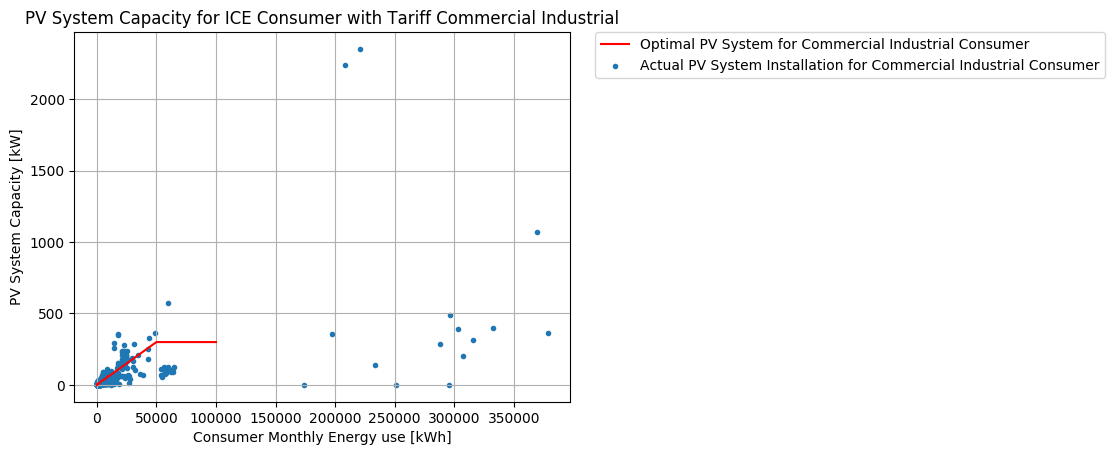

PyObject Text(0.5, 1, 'PV System Capacity for ICE Consumer with Tariff Commercial Industrial')

In [10]:
plot_single_tariff_category_per_company_with_model_prediction(all_ice, "Commercial Industrial", "ICE", comind_consumption, comind_model_predictions)

In [14]:
# Medium Voltage
consumption1 = 500:500:10000
tmt_model_predictions = []
for (ix, co) in enumerate(consumption1)
    ice_mediumvoltage.econsumption = co; get_pmax(ice_mediumvoltage);
    res = optimal_pv(ice_mediumvoltage, PVRes, 0.0:50:500, BAC1, tariff_increase = true)
    push!(tmt_model_predictions, res[1][2])
end

consumption2 = 10000:10000:200000
for (ix, co) in enumerate(consumption2)
    ice_mediumvoltage.econsumption = co; get_pmax(ice_mediumvoltage);
    res = optimal_pv(ice_mediumvoltage, PVRes, 0.0:50:500, BAC1, tariff_increase = true)
    push!(tmt_model_predictions, res[1][2])
end

consumption3 = 200000:100000:600000
for (ix, co) in enumerate(consumption3)
    ice_mediumvoltage.econsumption = co; get_pmax(ice_mediumvoltage);
    res = optimal_pv(ice_mediumvoltage, PVRes, 0.0:50:500, BAC1, tariff_increase = true)
    push!(tmt_model_predictions, res[1][2])
end

tmt_consumption = vcat(consumption1, consumption2, consumption3);

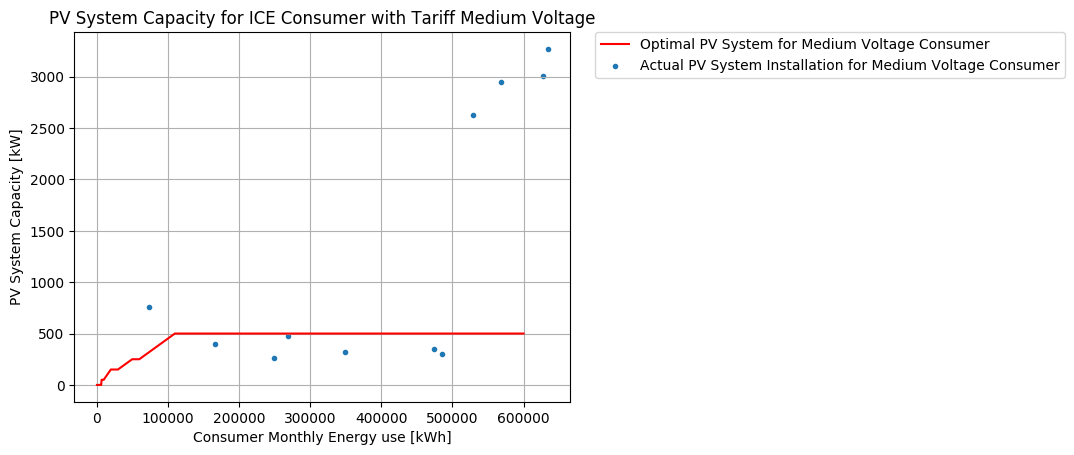

PyObject Text(0.5, 1, 'PV System Capacity for ICE Consumer with Tariff Medium Voltage')

In [15]:
plot_single_tariff_category_per_company_with_model_prediction(all_ice, "Medium Voltage", "ICE", tmt_consumption, tmt_model_predictions)

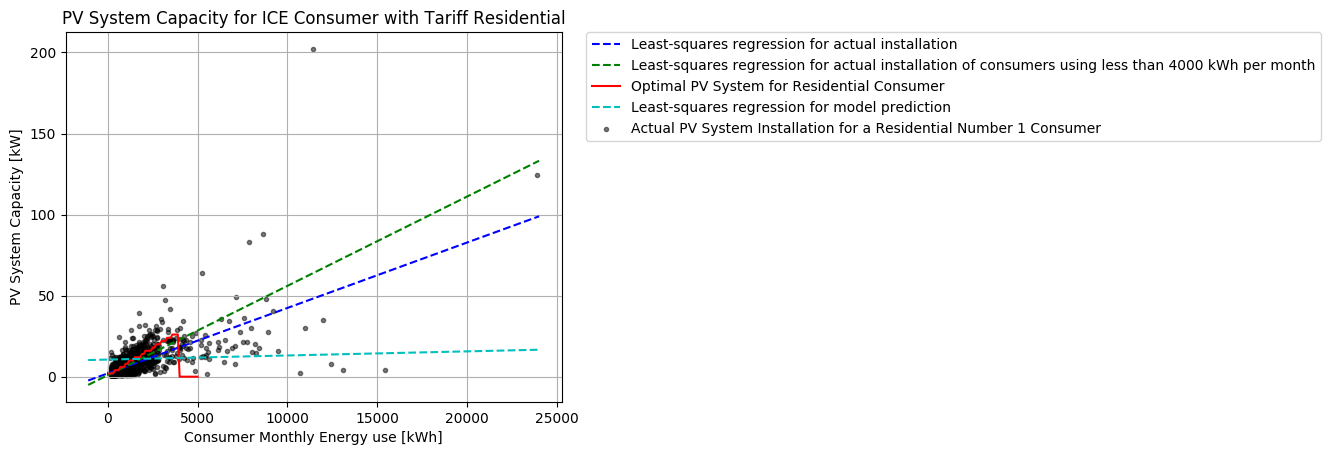

┌ Warning: `T` is deprecated, use `nonmissingtype` instead.
│   caller = (::getfield(StatsModels, Symbol("##40#41")){Array{Int64,1}})(::Array{Float64,1}) at none:0
└ @ StatsModels ./none:0


PyObject Text(0.5, 1, 'PV System Capacity for ICE Consumer with Tariff Residential')

In [7]:
plot_segmented_tariff_category_with_regression(all_ice, "Residential", "ICE", res_consumption, res_model_predictions, 4000)

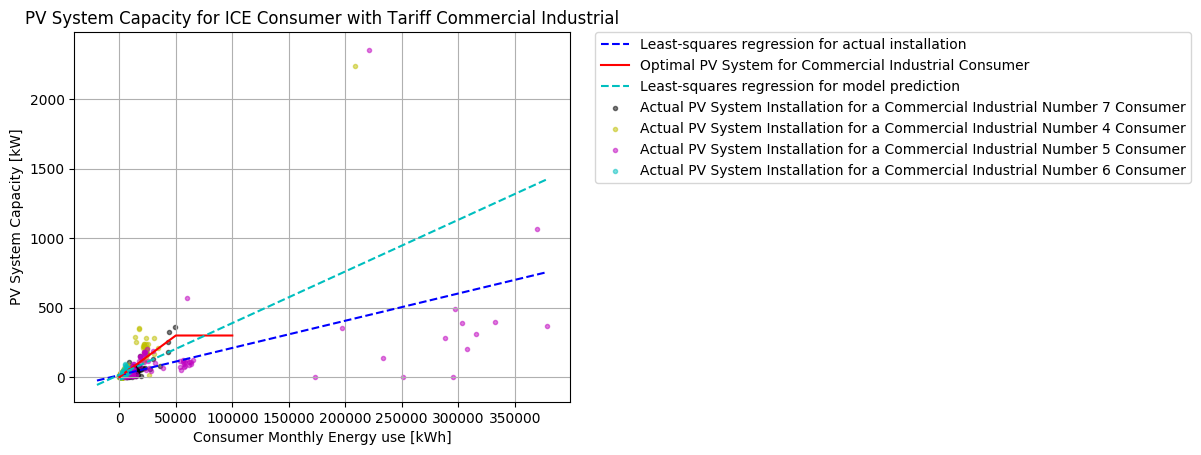

PyObject Text(0.5, 1, 'PV System Capacity for ICE Consumer with Tariff Commercial Industrial')

In [13]:
plot_segmented_tariff_category_with_regression(all_ice, "Commercial Industrial", "ICE", comind_consumption, comind_model_predictions)

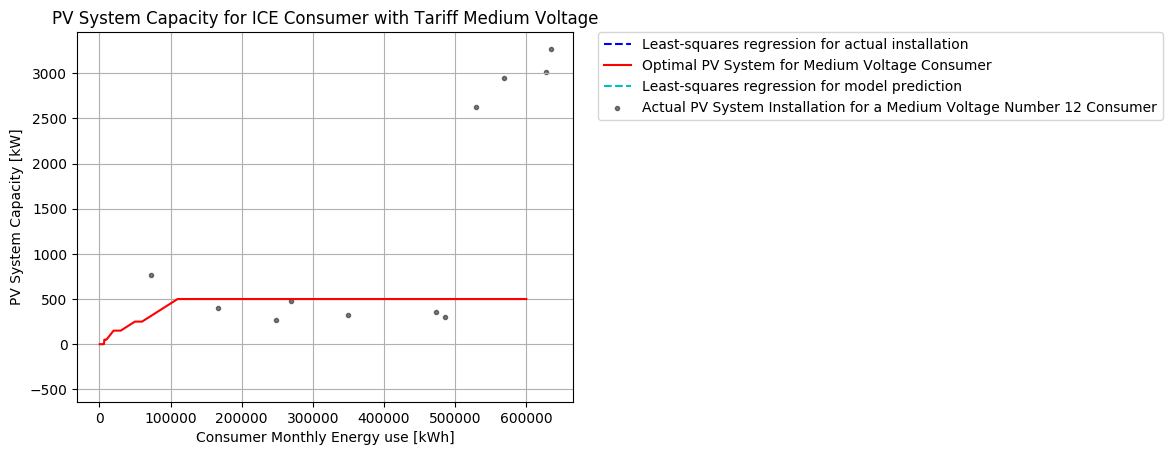

PyObject Text(0.5, 1, 'PV System Capacity for ICE Consumer with Tariff Medium Voltage')

In [17]:
plot_segmented_tariff_category_with_regression(all_ice, "Medium Voltage", "ICE", tmt_consumption, tmt_model_predictions)